In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
inspector = inspect(engine)

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Display the first row in Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x182b42fb4c0>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [10]:
# Display the first row in Station
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x182b1426130>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set and print
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
        order_by(Measurement.date).\
        filter(Measurement.date > year_ago).all()

#store the results as dicts
prcp_rows = [{'Date': result[0], 'Precipitation': result[1]} for result in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(prcp_rows).set_index('Date')
prcp.dropna(axis=0, how='any')

prcp

2016-08-22


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'Inches')

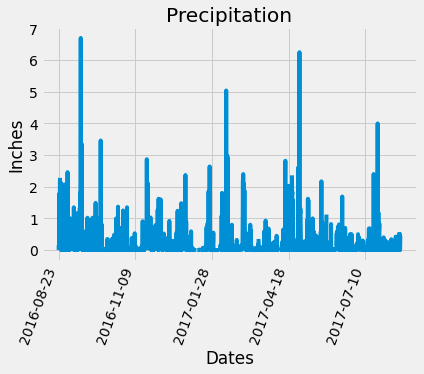

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp.plot(kind='line', figsize = (6,4), legend=None )
plt.xticks(rotation=70, ha='right')
plt.title('Precipitation in Hawaii')
plt.xlabel('Dates')
plt.ylabel('Inches')


In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp['Precipitation'].aggregate(['mean','median','var','std','sem'])

mean      0.177279
median    0.020000
var       0.212696
std       0.461190
sem       0.010259
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [19]:
# Close Session
session.close()